In [1]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_samples = []
train_labels = []

In [3]:
for i in range(1000):
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    
for i in range(50):
    random_younger = randint(13, 64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

/home/laus/.virtualenvs/virtual-py3/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

Using TensorFlow backend.


In [7]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(scaled_train_samples, train_labels, batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
 - 1s - loss: 0.6539 - acc: 0.5581
Epoch 2/20
 - 0s - loss: 0.6119 - acc: 0.6371
Epoch 3/20
 - 0s - loss: 0.5692 - acc: 0.7100
Epoch 4/20
 - 0s - loss: 0.5297 - acc: 0.7557
Epoch 5/20
 - 0s - loss: 0.4907 - acc: 0.7890
Epoch 6/20
 - 0s - loss: 0.4510 - acc: 0.8300
Epoch 7/20
 - 0s - loss: 0.4135 - acc: 0.8571
Epoch 8/20
 - 0s - loss: 0.3790 - acc: 0.8771
Epoch 9/20
 - 0s - loss: 0.3465 - acc: 0.8933
Epoch 10/20
 - 0s - loss: 0.3170 - acc: 0.9029
Epoch 11/20
 - 0s - loss: 0.2934 - acc: 0.9157
Epoch 12/20
 - 0s - loss: 0.2744 - acc: 0.9200
Epoch 13/20
 - 0s - loss: 0.2583 - acc: 0.9238
Epoch 14/20
 - 0s - loss: 0.2450 - acc: 0.9290
Epoch 15/20
 - 0s - loss: 0.2341 - acc: 0.9329
Epoch 16/20
 - 0s - loss: 0.2248 - acc: 0.9371
Epoch 17/20
 - 0s - loss: 0.2171 - acc: 0.9386
Epoch 18/20
 - 0s - loss: 0.2104 - acc: 0.9405
Epoch 19/20
 - 0s - loss: 0.2042 - acc: 0.9410
Epoch 20/20
 - 0s - loss: 0.1989 - acc: 0.9433


# Preprocess Test data

In [11]:
test_samples = []
test_labels = []

In [12]:
for i in range(10):
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range(200):
    random_younger = randint(13, 64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [13]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [14]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

/home/laus/.virtualenvs/virtual-py3/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Predictions

In [15]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0)

In [16]:
for i in predictions:
    print(i)

[0.8582236  0.14177637]
[0.16881827 0.83118176]
[0.5608807  0.43911928]
[0.01723693 0.98276305]
[0.6612943  0.33870572]
[0.21229625 0.78770375]
[0.8892891  0.11071087]
[0.3534468  0.64655316]
[0.4204233  0.57957673]
[0.09102012 0.9089799 ]
[0.9517287  0.04827134]
[0.14988932 0.85011065]
[0.95803434 0.04196569]
[0.06148111 0.93851894]
[0.9603262  0.03967381]
[0.01912142 0.9808786 ]
[0.9596236  0.04037646]
[0.01723693 0.98276305]
[0.87457794 0.12542202]
[0.32183185 0.6781682 ]
[0.9590632  0.04093686]
[0.04704516 0.9529548 ]
[0.38639775 0.6136023 ]
[0.05380839 0.94619155]
[0.93333006 0.06666991]
[0.03160332 0.9683966 ]
[0.9603262  0.03967381]
[0.3534468  0.64655316]
[0.9560482  0.04395176]
[0.02149443 0.9785056 ]
[0.9273371  0.07266292]
[0.07016686 0.9298332 ]
[0.95803434 0.04196569]
[0.23690988 0.7630901 ]
[0.95705223 0.04294776]
[0.0411384  0.95886153]
[0.9596236  0.04037646]
[0.0121284 0.9878715]
[0.9596236  0.04037646]
[0.02433764 0.9756623 ]
[0.5608807  0.43911928]
[0.02149443 0.9785

In [17]:
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size=10, verbose=0)

In [18]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
1
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


# Confusion Matrix

In [19]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
cm = confusion_matrix(test_labels, rounded_predictions)

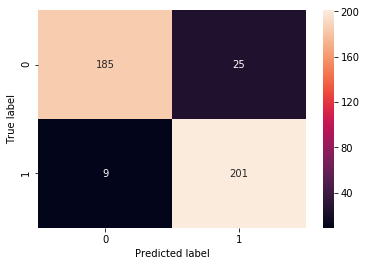

In [21]:
ax = plt.axes()
sns.heatmap(cm,annot=True,fmt='.5g', ax = ax) 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Save and Load Model

## 1. model.save()

In [22]:
model.save('medical_trial_model.h5')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

In [24]:
from keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [26]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [27]:
new_model.get_weights()

[array([[ 0.36052594, -0.5693807 ,  0.55063176,  0.7302026 ,  0.6128825 ,
          0.25918075,  0.44889954, -0.0070352 , -0.36083278,  0.35058415,
         -0.15377635, -0.13135599,  0.16218145,  0.6635311 ,  0.4402842 ,
         -0.02408093]], dtype=float32),
 array([ 0.03780906,  0.        , -0.13851134, -0.15858932, -0.12663199,
        -0.09662379, -0.11594727,  0.        ,  0.        , -0.12754516,
         0.        ,  0.17744114,  0.19280577,  0.17318337, -0.11936235,
         0.        ], dtype=float32),
 array([[ 3.71231228e-01, -5.36492653e-02, -2.13835895e-01,
         -1.06769085e-01, -8.28440189e-02,  1.38934821e-01,
         -2.24269956e-01,  1.84396610e-01,  1.05756804e-01,
         -3.02074552e-01,  2.38338336e-01,  3.64449285e-02,
          1.70295388e-01, -4.16639857e-02,  1.87481850e-01,
         -2.57548779e-01,  2.85643667e-01,  2.95934737e-01,
          1.11540608e-01, -2.42348582e-01, -3.43800008e-01,
         -9.95157510e-02, -2.21278369e-01, -9.77645740e-02,
 

In [30]:
new_model.optimizer

## 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecure only.

In [31]:
# save as JSON
json_string = model.to_json()

#save as YAML
# yaml_string = model.to_yaml()

In [32]:
json_string

'{"config": {"layers": [{"config": {"use_bias": true, "activation": "relu", "kernel_initializer": {"config": {"mode": "fan_avg", "distribution": "uniform", "scale": 1.0, "seed": null}, "class_name": "VarianceScaling"}, "dtype": "float32", "trainable": true, "batch_input_shape": [null, 1], "name": "dense_1", "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "bias_constraint": null, "bias_initializer": {"config": {}, "class_name": "Zeros"}, "units": 16, "kernel_constraint": null}, "class_name": "Dense"}, {"config": {"use_bias": true, "activation": "relu", "kernel_initializer": {"config": {"mode": "fan_avg", "distribution": "uniform", "scale": 1.0, "seed": null}, "class_name": "VarianceScaling"}, "trainable": true, "name": "dense_2", "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "bias_constraint": null, "bias_initializer": {"config": {}, "class_name": "Zeros"}, "units": 32, "kernel_constraint": null}, "class_name": "D

In [34]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML:
# from keras.models import model_from_yaml
# model= model_from_yaml(yaml_string)

In [35]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function to save the weights only.

In [36]:
model.save_weights('my_model_weights.h5')

In [37]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [38]:
model.load_weights('my_model_weights.h5')